In [6]:
import skimage
skimage.__version__

'0.20.0'

In [5]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m  pip install --upgrade pip
#!{sys.executable} -m  pip install -U scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 1.1 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [7]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

(251, 423, 3)


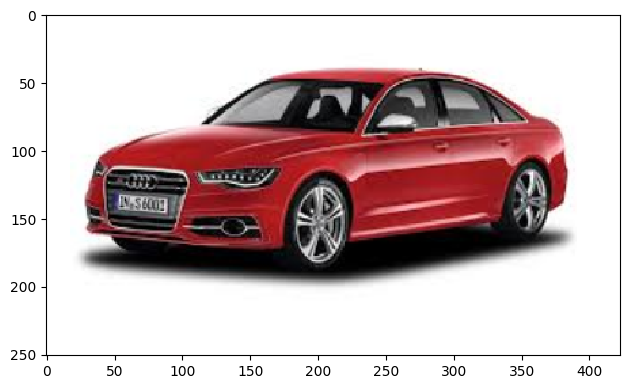

In [8]:
img = imread("voiture.png")
imshow(img)
print(img.shape)

(128, 64, 3)


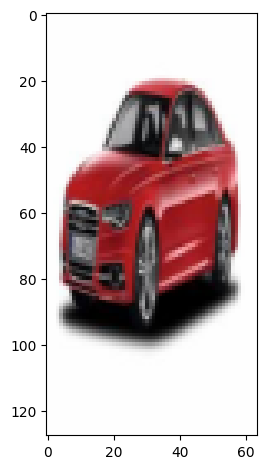

In [9]:
#echelle
img_echelle = resize(img, (128,64))
imshow(img_echelle)
print(img_echelle.shape)

In [12]:
#obtenir Hog
fd, hog_image = hog(img_echelle, orientations=9,pixels_per_cell=(8,8),
                   cells_per_block=(2,2), visualize=True, channel_axis=-1
                   #, multichannel=True
                   )
fd.shape

(3780,)

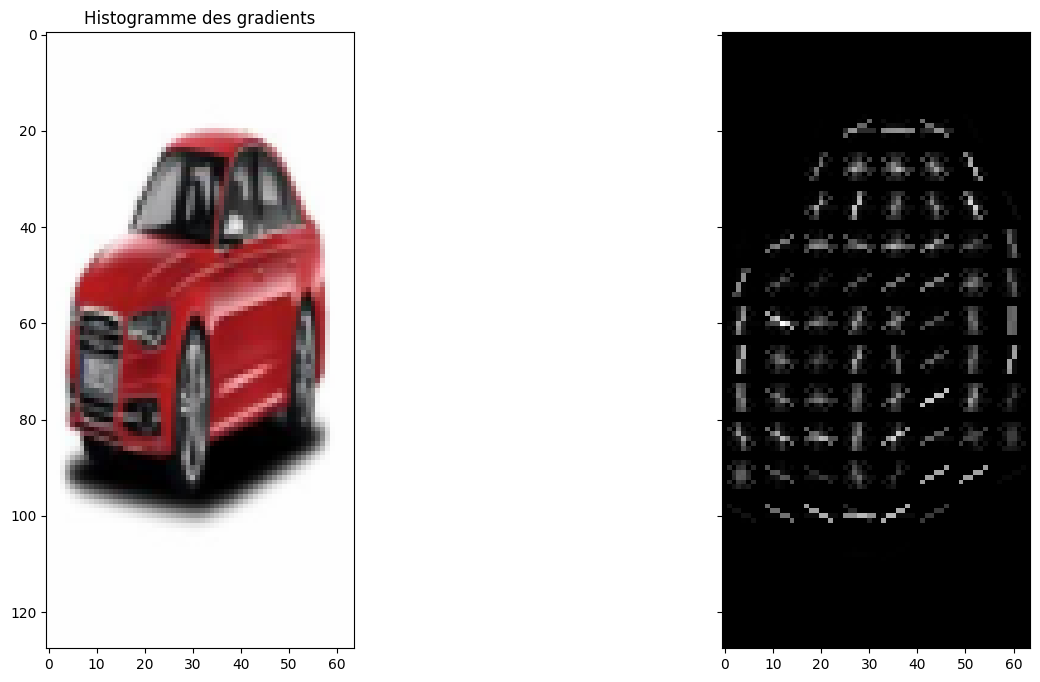

In [13]:
#image HOG
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8), sharex=True, sharey=True)
ax1.imshow(img_echelle, cmap=plt.cm.gray)
ax1.set_title("Image input")

#Changement d'intensité dans image HOG
hog_image_intensite  =exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.imshow(hog_image_intensite, cmap=plt.cm.gray)
ax1.set_title("Histogramme des gradients")
plt.show()